In [1]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# Read housing data set csv into memory
data=pd.read_csv("../data/Boston_housing_data.csv",low_memory='False')

# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

In [8]:
# Upper case all data frame column names
data.columns=map(str.upper, data.columns)

#check dimensions of data set
(rows,features)= data.shape
print "Number of rows in data set - ", rows
print "Number of features in data set - ",features
print data.head(10)
#convert RAD and CHAS to categoric type
data['RAD']=data['RAD'].astype('category')
data['CHAS']=data['CHAS'].astype('category')
data.describe()
data['CHAS'].describe()
data['RAD'].describe()

Number of rows in data set -  506
Number of features in data set -  14
      CRIM        ZN    INDUS CHAS      NOX       RM        AGE      DIS RAD  \
0 0.006320 18.000000 2.310000    0 0.538000 6.575000  65.200000 4.090000   1   
1 0.027310  0.000000 7.070000    0 0.469000 6.421000  78.900000 4.967100   2   
2 0.027290  0.000000 7.070000    0 0.469000 7.185000  61.100000 4.967100   2   
3 0.032370  0.000000 2.180000    0 0.458000 6.998000  45.800000 6.062200   3   
4 0.069050  0.000000 2.180000    0 0.458000 7.147000  54.200000 6.062200   3   
5 0.029850  0.000000 2.180000    0 0.458000 6.430000  58.700000 6.062200   3   
6 0.088290 12.500000 7.870000    0 0.524000 6.012000  66.600000 5.560500   5   
7 0.144550 12.500000 7.870000    0 0.524000 6.172000  96.100000 5.950500   5   
8 0.211240 12.500000 7.870000    0 0.524000 5.631000 100.000000 6.082100   5   
9 0.170040 12.500000 7.870000    0 0.524000 6.004000  85.900000 6.592100   5   

   TAX   PTRATIO          B     LSTAT      MEDV 

count     506
unique      9
top        24
freq      132
Name: RAD, dtype: int64

 Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [26]:
print data.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'MEDV'],
      dtype='object')


In [5]:
# As part of my research, I'm interested in seeing the correlation between MEDV and 
# proximity from schools, employment centres 
# Pollution levels and social status
'''
Output variable
-----------------
MEDV     Median value of owner-occupied homes in $1000's

Features I'm interested in : 
==============================================================

NOX       nitric oxides concentration (parts per 10 million)
RAD       index of accessibility to radial highways
CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
DIS       weighted distances to five Boston employment centres
PTRATIO  pupil-teacher ratio by town
LSTAT    % lower status of the population
==============================================================

Features which directly impact house value:
------------------------------------------------
RM        average number of rooms per dwelling
AGE       proportion of owner-occupied units built prior to 1940


'''

data = data [["MEDV","NOX","RAD","CHAS","DIS","PTRATIO","LSTAT","RM","AGE"]]

print " current data set dimensions", data.shape

 current data set dimensions (506, 9)


In [6]:
#setting variables you will be working with to numeric
data['MEDV'] = pd.to_numeric(data['MEDV'])
data['NOX'] = pd.to_numeric(data['NOX'])
# data['RAD'] = pd.to_numeric(data['RAD'])
# data['CHAS'] = pd.to_numeric(data['CHAS'])
data['DIS'] = pd.to_numeric(data['DIS'])
data['PTRATIO'] = pd.to_numeric(data['PTRATIO'])
data['LSTAT'] = pd.to_numeric(data['LSTAT'])
data['RM'] = pd.to_numeric(data['RM'])
data['AGE'] = pd.to_numeric(data['AGE'])

## UniVariate Analysis

***Continuous Explanatory Variable - NOX***

In [7]:
# NOX indicates nitric oxides concentration - parts per 10 million
# This being an indicator of pollution level, NOX should negatively impact house value

print "\n** Frequency ditribution of NOX feature **" 
print data["NOX"].value_counts(dropna='False').sort_index()
print "Percentages for NOX"
data["NOX"].value_counts(normalize='True',dropna='False').sort_index()


** Frequency ditribution of NOX feature **
0.385000     1
0.389000     1
0.392000     2
0.394000     1
0.398000     2
0.400000     4
0.401000     3
0.403000     3
0.404000     3
0.405000     3
0.409000     3
0.410000     3
0.411000     6
0.413000     6
0.415000     2
0.416100     3
0.422000     1
0.426000     4
0.428000     8
0.429000     3
0.431000    10
0.433000     3
0.435000     1
0.437000    17
0.437900     2
0.439000     4
0.442000     3
0.442900     4
0.445000     5
0.447000     5
            ..
0.538000    23
0.544000    12
0.547000     9
0.550000     4
0.573000     5
0.575000     2
0.580000     4
0.581000     7
0.583000     4
0.584000     8
0.585000     8
0.597000     6
0.605000    14
0.609000     5
0.614000     7
0.624000    15
0.631000     5
0.647000    10
0.655000     3
0.659000     2
0.668000     3
0.671000     7
0.679000     8
0.693000    14
0.700000    11
0.713000    18
0.718000     6
0.740000    13
0.770000     8
0.871000    16
Name: NOX, dtype: int64
Percentages for N

0.385000   0.001976
0.389000   0.001976
0.392000   0.003953
0.394000   0.001976
0.398000   0.003953
0.400000   0.007905
0.401000   0.005929
0.403000   0.005929
0.404000   0.005929
0.405000   0.005929
0.409000   0.005929
0.410000   0.005929
0.411000   0.011858
0.413000   0.011858
0.415000   0.003953
0.416100   0.005929
0.422000   0.001976
0.426000   0.007905
0.428000   0.015810
0.429000   0.005929
0.431000   0.019763
0.433000   0.005929
0.435000   0.001976
0.437000   0.033597
0.437900   0.003953
0.439000   0.007905
0.442000   0.005929
0.442900   0.007905
0.445000   0.009881
0.447000   0.009881
             ...   
0.538000   0.045455
0.544000   0.023715
0.547000   0.017787
0.550000   0.007905
0.573000   0.009881
0.575000   0.003953
0.580000   0.007905
0.581000   0.013834
0.583000   0.007905
0.584000   0.015810
0.585000   0.015810
0.597000   0.011858
0.605000   0.027668
0.609000   0.009881
0.614000   0.013834
0.624000   0.029644
0.631000   0.009881
0.647000   0.019763
0.655000   0.005929


**Histogram for Nox**

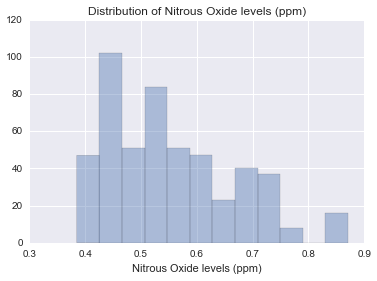

In [10]:
seaborn.distplot(data['NOX'].dropna(),kde=False)
plt.xlabel("Nitrous Oxide levels (ppm)")
plt.title("Distribution of Nitrous Oxide levels (ppm)")

*NOX values have a range of 0.486 , spread across values (0.385 , 0.871). There are no missing values.
Distribution seems to be skewed to right. And it is multi modal distribution*


***Correlation with Response Variable (Q->Q)***

C:\Users\212458098\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


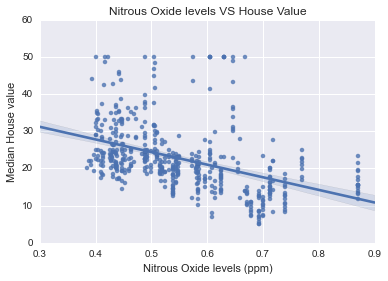

In [25]:
seaborn.regplot(x='NOX',y='MEDV',data=data)
plt.xlabel("Nitrous Oxide levels (ppm)")
plt.ylabel("Median House value")
plt.title("Nitrous Oxide levels VS House Value")

**Categoric variable -  RAD**

In [17]:
# RAD is an index of accessibility to radial highways 
# This captures locational advantages besides nearness to workplace
# This should positively impact house value

print "\n** Frequency ditribution of RAD feature **" 
print data["RAD"].value_counts(dropna='False').sort_index()
print "Percentages for RAD"
data["RAD"].value_counts(normalize='True',dropna='False').sort_index()


** Frequency ditribution of RAD feature **
1      20
2      24
3      38
4     110
5     115
6      26
7      17
8      24
24    132
dtype: int64
Percentages for RAD


1    0.039526
2    0.047431
3    0.075099
4    0.217391
5    0.227273
6    0.051383
7    0.033597
8    0.047431
24   0.260870
dtype: float64

***Bar diagram count plot***

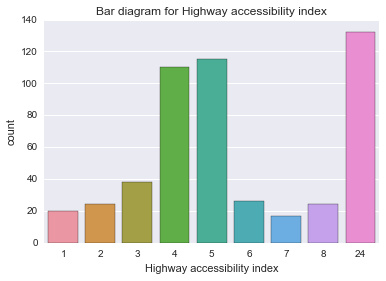

In [21]:
seaborn.countplot(x='RAD',data=data)
plt.xlabel("Highway accessibility index")
plt.title("Bar diagram for Highway accessibility index")

***Correlation with Response variable(C->Q)***

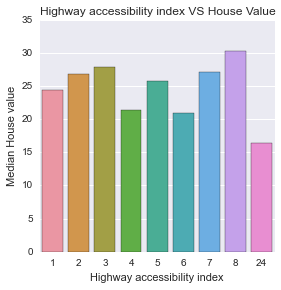

In [32]:
seaborn.factorplot(x='RAD',y='MEDV', kind="bar",data=data,ci=None)
plt.xlabel("Highway accessibility index")
plt.ylabel("Median House value")
plt.title("Highway accessibility index VS House Value")

In [15]:
# CHAS indicates if tract is bound by Charles River or not
# It is expected that places surrounded by rivers have higher house value

print "\n** Frequency ditribution of CHAS feature **" 
print data["CHAS"].value_counts(dropna='False').sort_index()
print "Percentages for CHAS"
data["CHAS"].value_counts(normalize='True',dropna='False').sort_index()



** Frequency ditribution of CHAS feature **
0    471
1     35
dtype: int64
Percentages for CHAS


0   0.930830
1   0.069170
dtype: float64

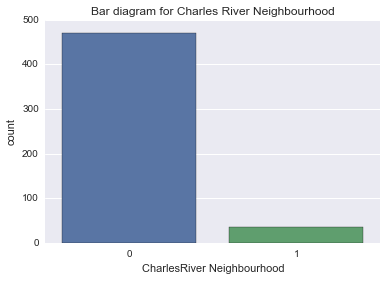

In [18]:
seaborn.countplot(x='CHAS',data=data)
plt.xlabel("CharlesRiver Neighbourhood")
plt.title("Bar diagram for Charles River Neighbourhood")

*** Continuous Variable - DIS***

In [19]:
# DIS is weighted distance to five Boston employment centres 
#  This should negatively impact house value

print "\n** Frequency ditribution of DIS feature **" 
print data["DIS"].value_counts(dropna='False').sort_index()
print "Percentages for DIS"
data["DIS"].value_counts(normalize='True',dropna='False').sort_index()



** Frequency ditribution of DIS feature **
1.129600     1
1.137000     1
1.169100     1
1.174200     1
1.178100     1
1.202400     1
1.285200     1
1.316300     1
1.321600     1
1.332500     1
1.344900     1
1.345900     1
1.356700     1
1.358000     1
1.386100     2
1.411800     1
1.413000     1
1.416500     1
1.419100     1
1.425400     1
1.426100     1
1.439400     1
1.439500     1
1.454700     1
1.460800     1
1.465500     1
1.467200     1
1.489600     1
1.500400     1
1.510600     1
            ..
7.035500     2
7.037900     1
7.225400     1
7.225500     1
7.307300     2
7.309000     3
7.317200     3
7.319700     1
7.396700     2
7.653400     2
7.814800     1
7.826500     2
7.827800     3
7.954900     2
7.980900     1
8.013600     2
8.055500     2
8.324800     1
8.344000     1
8.535300     1
8.696600     1
8.792100     2
8.906700     2
9.089200     1
9.187600     1
9.220300     2
9.222900     1
10.585700    2
10.710300    2
12.126500    1
Name: DIS, dtype: int64
Percentages for D

1.129600    0.001976
1.137000    0.001976
1.169100    0.001976
1.174200    0.001976
1.178100    0.001976
1.202400    0.001976
1.285200    0.001976
1.316300    0.001976
1.321600    0.001976
1.332500    0.001976
1.344900    0.001976
1.345900    0.001976
1.356700    0.001976
1.358000    0.001976
1.386100    0.003953
1.411800    0.001976
1.413000    0.001976
1.416500    0.001976
1.419100    0.001976
1.425400    0.001976
1.426100    0.001976
1.439400    0.001976
1.439500    0.001976
1.454700    0.001976
1.460800    0.001976
1.465500    0.001976
1.467200    0.001976
1.489600    0.001976
1.500400    0.001976
1.510600    0.001976
              ...   
7.035500    0.003953
7.037900    0.001976
7.225400    0.001976
7.225500    0.001976
7.307300    0.003953
7.309000    0.005929
7.317200    0.005929
7.319700    0.001976
7.396700    0.003953
7.653400    0.003953
7.814800    0.001976
7.826500    0.003953
7.827800    0.005929
7.954900    0.003953
7.980900    0.001976
8.013600    0.003953
8.055500    0

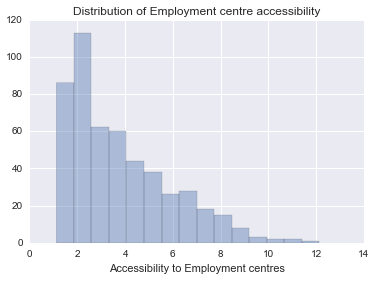

In [20]:
seaborn.distplot(data['DIS'].dropna(),kde=False)
plt.xlabel("Accessibility to Employment centres")
plt.title("Distribution of Employment centre accessibility")

*Employment centre accessibility distribution is unimodal and is skewed towards right. This has a mode at around 2 and has a spread of around 11*

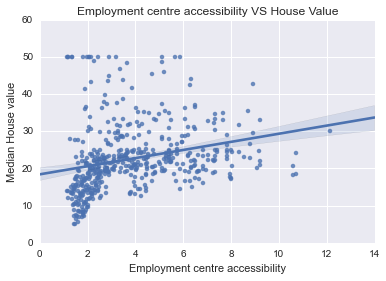

In [33]:
seaborn.regplot(x='DIS',y='MEDV',data=data)
plt.xlabel("Employment centre accessibility")
plt.ylabel("Median House value")
plt.title("Employment centre accessibility VS House Value")